# Basic Python classes

# memory diagrams
- the code in the next cell draws memory diagrams
- don't try to understand the code

if you're not interested in the memory diagrams, ignore
the rest of this cell and the next one. do not try
to evaluate the next cell, it will bomb

if you do want the memory diagrams, then in a shell, do:

pip install svgwrite

then evaluate the next cell. 

In [23]:
import svgwrite
import collections

nobinding = "nobinding"

def binding(var):
    try:
        return eval(var)
    except NameError:
        return nobinding
    
class listis:
    def __init__(self):
        self.lis = []
    def get(self, key):
        for k,v in self.lis:
            if key is k:
                return v
    def put(self, key, val):
        new = True
        for pair in self.lis:
            if pair[0] is key:
                pair[1].append(val)
                new = False
        if new:
            self.lis.append([key, [val]])
    def keys(self):
        return [k for k,v in self.lis]

class memgraph:
    def __init__(self, vars):
        self.vars = sorted(vars)
        
    def _repr_svg_(self):
        d = svgwrite.Drawing(size=(800,200))

        left = 100
        right = 260
        dy = 30
        vv = listis()
        ais = listis()
        
        for var in self.vars:
            val = binding(var)
            if val != nobinding:
                vv.put(val,var)
                ais.put(val, val)

        vals = ais.keys()
        vary = dict()
        
        y = dy
        d.add(d.text("Variables", insert=(left, y), text_anchor="end", fill='blue'))
        y += dy
        
        for var in self.vars:
            d.add(d.text(var, insert=(left, y), text_anchor="end", fill='black'))
            vary[var] = y
            y += dy

        y = dy
        d.add(d.text("Objects(in the Heap)", insert=(right, y), fill='blue'))
        y += dy
        
        for val in vals:
            d.add(d.text(str(val), insert=(right, y), fill='black'))

            for var in vv.get(val):
                ly = vary[var]
                d.add(d.line((left, ly ), (right, y),  stroke=svgwrite.rgb(90, 10, 16, '%')))
            y += dy
            
        return d.tostring()

    def svg(self):
        return self._repr_svg_()



ModuleNotFoundError: No module named 'svgwrite'

# Python Comments
- anything on a line after a '#" is a comment and ignored by Python,
unless the '#' is inside a string constant

# Classes
- classes define "templates or blueprints" for building objects
- once a class is defined, any number of objects can be "constructed", or "instantiated"
- EVERYTHING in Python is an 'object'
    - not true in Java/C++
- all Python objects are stored in the 'heap'
- each object has a fixed 'type', which can be accessed via the 'type' function
- objects have attributes, which are "named slots for objects"
- a 'method' is an attribute holding a function object, which can access and modify the object attributes
- class methods are invoked by functions, operators, and the "." syntax. 

# Number Types
- int - arbitrary precision
- float - 64 bits
- complex
- numbers evaluate to themselves

In [24]:
# number with no decimal point is an integer

1234 

1234

In [25]:
# number with decimal point is a float

2.3

2.3

In [26]:
# exponetial notation is a float, even
# w/o decimal
# XeY is X*10^Y

2e3

2000.0

In [27]:
# Python has the usual arithmetic operators

3*4 - 2**3

4

In [28]:
# a float "contaminates" an arithmetic expression and 
# makes it type float

3*4 - 2**3.2

2.810413160023719

In [29]:
# arbitrary precision integers
# integer size limited only by available memory

2**300

2037035976334486086268445688409378161051468393665936250636140449354381299763336706183397376

In [30]:
# 'type' returns the type or class name of an object

type(2**100)

int

### Integer division operators 




In [31]:
# in most languages this would be an int,
# but in Python, it is a float

7/2

3.5

In [32]:
# // is integer divide

7//2


3

In [33]:
# mod or remainder

7%2

1

### Float division operators 

In [34]:
7.0 / 2.0

3.5

In [35]:
7.0 // 2.0

3.0

In [36]:
7.0 % 2.0

1.0

### Complex numbers 

In [37]:
# a complex number times its conjagate is real 
# j is the square root of -1
# type name is 'complex'

[(3+4j)*(3-4j), type(3+4j)]

[(25+0j), complex]

# Constructors
- usually the type name is a function that constructs an object of that type

In [38]:
# int constructor function tries to convert arg to an int

int('2345')

2345

In [39]:
int(3.45)

3

In [40]:
int(343)

343

In [41]:
# likewise for float

float('3.45')

3.45

In [42]:
float(3)

3.0

In [43]:
float(3)

3.0

# Object references and variables
- all objects live in the "heap"
- variables hold 'references' to objects. 
- variables do not have or enforce any notion of type
- a given object can have any number of references to it
    - analogy: Say your dorm room is John Jay 604
        - clubs, friends, magazines, banks, vendors, Columbia have a "reference" to your room
- there are TWO notions of equality in Python
    - the 'is' operator is true if 
        - the two references are to the same object
    - the '==' operator is true if
        - the two references are to the same object, or to two different objects that "print the same way"(vague!! we will refine later)

In [44]:
x = 123456
y = 123456
z = y

# graph memory

memgraph(['x', 'y','z'])


NameError: name 'memgraph' is not defined

In [ ]:
# are x & y references to the same object?

x is y

In [ ]:
# are y & z references to the same object?

y is z

In [ ]:
# y is z => y == z

y == z

In [ ]:
# are x & y 'equivalent' in some sense?
# yes - x & y are different objects, 
# but they 'represent' the same integer
# they look the same when they print

x == y

# Singletons
- a singleton is a type of object that has at most 
ONE (single) instantiation


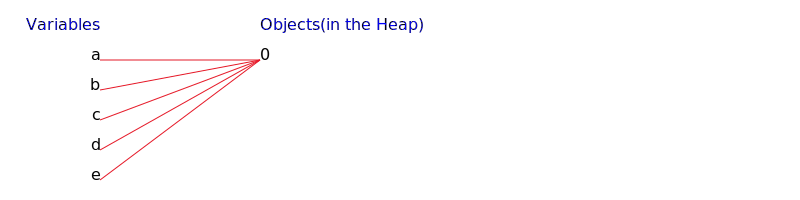

In [7]:
# if we try a small int, like 4, instead of 123456, 
# we get a different result!

# small ints are singletons for efficiency reasons.
# so, no matter how you compute a '0', 
# you'll get the same '0' object

a = 0
b = 0
c = 6 - 2*3
d = 2*0
e = 2**2 - 4
memgraph(['a','b','c','d','e'])

In [8]:
# over 4,000 references to the '0' object!
import sys

sys.getrefcount(0)

4598

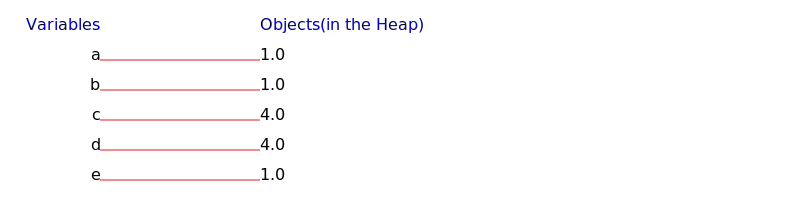

In [9]:
# small floats are not singletons

a = 1.0
b = 1.0
c = 2.0 * 2.0
d = 4.0
e = 2.0/2.0
memgraph(['a','b','c','d','e'])

# None
- Like 'null' in other languages
- Means failure or absence of a value
- is a singleton(there is only one object of class None)
- does not print at top level, can be very confusing

In [10]:
# no output!

None

In [13]:
# print function prints each arg
# explicit print will show it

print(1,2,"string" , None)

1 2 string None


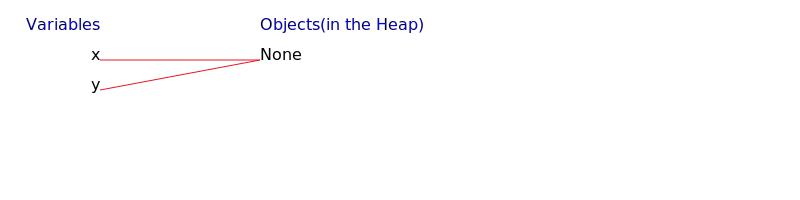

In [14]:
x = None
y = None

memgraph(['x', 'y'])

# Booleans
+ Objects: False, True(both singletons)
+ Operators on Booleans: 'not', 'and', 'or'
- Comparisons that yield Booleans:
    - <
    - <
    - <=
    - =>
- unlike many languages, &, &&, |, ||, ~, are not boolean operators

In [15]:
not(True and (True or False))

False

In [16]:
1234<=1234

True

In [17]:
123<345

True

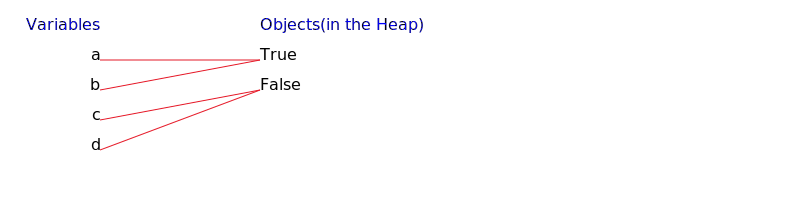

In [18]:
a = 3<56
b = 343<5656
c = 234 == 2343
d = 1234 == 123

memgraph(['a','b','c','d'])

# Functions
- the 'def' statement defines a function object
- functions are "first class" objects in Python - they can be assigned to variables, passed as args, and returned from functions
- by default, functions return 'None' - you must use the 'return' statement to return a value
- note the ':' at the end of the first line, and the indenting of the function body. this is how you define a 'statement block' in Python. (C++ and Java use '{}' to define blocks)
- usually indent by using tab key
- we will learn much more about functions later

In [21]:
# returns 'None', so no output shown,
# seems like nothing happened

def add2(x):
    x + 2

add2(3)

In [22]:
# must use return

def add2(x):
    return x + 2

add2(3)

5

# Atomic Object Types
- types we have seen so far are 'atomic' - they can not
be broken up into subparts

# Collection Types 
+ hold multiple objects in various configurations
+ several kinds are built into the language
+ can write "collection literals"
- very easy to use
- some are mutable
    - can be modified at any time
- some immutable
    - can't ever be modified

# Sequence Data Types
- a sequence data type is an ordered set of objects drawn from 
some domain, with duplicates allowed
- we will see three sequence types:
    - list
        - domain is any Python object
        - mutable
    - tuple
        - domain is any Python object
        - immutable
    - str
        - domain is characters
        - immutable
- they have many capabilities in common

# list
- the heart of Python
- some of the "art of Python" involves getting good at manipulating lists
- a list holds a ordered sequence of objects
- duplicates are allowed
- lists grow and shrink automatically as elements are added and deleted
- list objects do not have to be the same type
- lists are zero origin - index of first element is 0
- lists are mutable
- some methods, like 'index' and 'count', have no 'side effects' - they don't modify the list
- others, like reverse, modify the list
- methods that modify the list typically return 'None'
- type name is 'list'
- [doc](https://docs.python.org/3/tutorial/datastructures.html)

In [24]:
# can make a list by just typing it in
# don't need to use an API

['foo', 'bar']

['foo', 'bar']

In [25]:
type([2,3,4])

list

In [26]:
# order matters for lists
# same elements, but different order

[1,2,3] == [2,1,3]

False

In [27]:
# same elements, same order

[2,1,3] == [2,1,3]

True

In [28]:
# but not the same list

[2,1,3] is [2,1,3]

False

In [29]:
# duplicates are ok in a list

[1,1,2,3]

[1, 1, 2, 3]

In [30]:
# the assigment statement does not print the 
# right hand side value. you have to evaluate
# the variable by itself to see the value.

x = 23423
x

23423

In [31]:
# a list can hold different types - any Python object

x = [100, 111.111, None, "zap", True, None, 300]
y = x

In [ ]:
# len returns the length of a list

len(x)

In [34]:
# 'count' method returns a value, 
# does not modify the list
# count the number of None's
# here the 'dot syntax' is used to 
# invoke the list 'count method' 

x.count(None)

2

In [35]:
x.count(324)

0

In [36]:
x

[100, 111.111, None, 'zap', True, None, 300]

In [37]:
y

[100, 111.111, None, 'zap', True, None, 300]

In [38]:
# x and y reference the same object

x is y

True

In [39]:
# reverse returns None - a hint that it modifies the list
# the 'reverse method' on the list class is invoked

x.reverse()

In [40]:
x

[300, None, True, 'zap', None, 111.111, 100]

In [41]:
# what happened to y?
# we didn't explicitly do anything to y, but
# since y references the same object as x,
# it 'sees' the reverse that x.reverse() did

y

[300, None, True, 'zap', None, 111.111, 100]

In [42]:
# very common mistake 
# reverse does NOT return the reversed list - 
# it just returns None!
# so if you do this, you just lost your list!

z = [1,2,3,4,5,6]
z = z.reverse()
print(z)

None


In [43]:
# Another common mistake 
# leaving off the '()' just 
# returns the function object
# and the reverse function does NOT run

z = [1,2,3,4,5,6]
z.reverse

<function list.reverse()>

In [44]:
# so no change to z

z

[1, 2, 3, 4, 5, 6]

# List Indexing
- access and set one element in list

In [45]:
x

[300, None, True, 'zap', None, 111.111, 100]

In [46]:
# Python has very convenient techniques 
# for accessing and modifying list elements 
# can index into the list like an array, 
# and retrieve one element
# arrays are "zero origin" - first index is 0

x[2]

True

In [47]:
# negative index starts from the last list element

x[-2]

111.111

In [48]:
x

[300, None, True, 'zap', None, 111.111, 100]

In [49]:
# can set list elements

x[0] = -1
x

[-1, None, True, 'zap', None, 111.111, 100]

In [50]:
# indexes are always bounds checked
# Python will throw an error on bad index

x[32404]

IndexError: list index out of range

# List Slicing
- access/modify multiple list elements

In [51]:
x

[-1, None, True, 'zap', None, 111.111, 100]

In [52]:
# can take a subsequences (slice) of the list
# like range, inclusive/exclusive indexes
# slices always COPY the original list

x[0:2]

[-1, None]

In [53]:
# missing second index means continue slice 
# to the end of the list

x[3:]

['zap', None, 111.111, 100]

In [55]:
# missing first index means start slice 
# at begining  of the list

x[:3]

[-1, None, True]

In [56]:
x

[-1, None, True, 'zap', None, 111.111, 100]

In [57]:
# can add a index increment to a slice

x[0:8:2]

[-1, True, None, 100]

In [58]:
# can go backwards

x[7:0:-2]

[100, None, True]

In [59]:
# slices can be named for readability

triple = slice(0,8,2)
x[triple]

[-1, True, None, 100]

In [60]:
# index missing on both sides of ":"
# the slice is the whole list
# this is common, if not obvious,
# Python shorthand for copying
# an entire list

x2 = x[:]

# reverse modifies x2, but x will not be changed, because
# x and x2 are referencing different objects
# note reverse() returns 'None'

print(x)
print(x2)

print(x2.reverse())

print(x)
print(x2)

[-1, None, True, 'zap', None, 111.111, 100]
[-1, None, True, 'zap', None, 111.111, 100]
None
[-1, None, True, 'zap', None, 111.111, 100]
[100, 111.111, None, 'zap', True, None, -1]


- try using the [Python Tutor](http://pythontutor.com/visualize.html#mode=edit)

```
x=[300, None, True, 'zap', None, 111.111, 100]
xsame = x
xcopy = x[:]
xcopy.reverse()
y = x[1:5]
u = x[3:]
v = x[:2]
w = x[7:0:-2]
```

In [61]:
x

[-1, None, True, 'zap', None, 111.111, 100]

In [63]:
# can set slices

x[1:3] = [2**8, 3.14]
x

[-1, 256, 3.14, 'zap', None, 111.111, 100]

# Common List Operations

In [64]:
#  'in' operator - is an element in the list somewhere?
# uses == to test

[x, 'zap' in x, 55 in x]

[[-1, 256, 3.14, 'zap', None, 111.111, 100], True, False]

In [65]:
# where is the element?
# 'index' is a 'method' on the list class

x.index('zap')

3

In [66]:
# index throws an error if it doesn't find anything

x.index("not in x")

ValueError: 'not in x' is not in list

In [67]:
# + concatenates lists
# note: what '+' actually does depends on the type of its arguments

x = list(range(5))
x + x

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [68]:
x

[0, 1, 2, 3, 4]

In [69]:
# add one element at the end

x.append([22,33])
x

[0, 1, 2, 3, 4, [22, 33]]

In [70]:
# add N elements at the end

x.extend([22,33])
x

[0, 1, 2, 3, 4, [22, 33], 22, 33]

In [71]:
# add one element anywhere

x.insert(2, 5)
x

[0, 1, 5, 2, 3, 4, [22, 33], 22, 33]

In [72]:
# pop method removes and returns a 
# list element, by default the last element

print(x.pop())
print(x)

33
[0, 1, 5, 2, 3, 4, [22, 33], 22]


In [73]:
# but can specify which element to pop

print(x.pop(2))
print(x)

5
[0, 1, 2, 3, 4, [22, 33], 22]


In [74]:
# remove first 4 found

x.remove(4)
print(x)

[0, 1, 2, 3, [22, 33], 22]


In [75]:
# sort modifies the list
# and returns None

x = [34,3,5,22]
x.sort()


In [76]:
x

[3, 5, 22, 34]

In [77]:
# can preserve original list by using 'sorted'
# sorted makes a copy of the input list

x = [34,3,5,22]
y = sorted(x)
[x, y]

[[34, 3, 5, 22], [3, 5, 22, 34]]

# Example

In [78]:
a = [1,[[2,3],4]]
b = a[1]
c = b[0]
b = b[1]
d = a[0]
c[1] = b

- what values for a,b,c,d will the print statements show?

In [79]:
print(a)
print(b)
print(c)
print(d)

[1, [[2, 4], 4]]
4
[2, 4]
1


- try using the [Python Tutor](http://pythontutor.com/visualize.html#mode=edit)

In [ ]:
# dir function shows the methods defined on a class
# __XYZ__ are "special" methods - ignore them for now

dir(list)

# Iterable Objects
- iterable objects can produce their constituent elements, one at a time
- an iterable implements an iteration protocol(more about this later)
- the 'len' function computes how many elements an iterable has
- a list is an iterable

In [80]:
len([3,54,6])

3

# for loop
- will pull elements out of an iterable
```
for element in iterable:
    element is bound to the elements return by the iterable
    loop body is 
    indented
end of indentation is end of loop
```


- note trailing ':', and indented statements - defines a 'statement block'


In [81]:
for j in [5,2,7,9]:
    print(j)
    print(j+10)
print('loop finished')

5
15
2
12
7
17
9
19
loop finished


# range 
- range' is an iterable 
- specifies a sequence of integers with slice like limits
- often used to control loop iteration
- full form is range(start, end, increment)
    - range(start,end) is the same as range(start,end,1)
    - range(end) is the same as range(0, end, 1)
- range start/end arguments are inclusive/exclusive

In [82]:
# len works

len(range(6))

6

In [83]:
# the list constructor expects an iterable, 
# and makes a list out of the iterator elements
# note: end limit is exclusive, so 10 is not in the list

list(range(2, 10, 2))

[2, 4, 6, 8]

In [84]:
# to sum up a list of numbers
# use an 'accumulation variable'

total = 0

for j in range(5):
    print(j)
    total += j

total

0
1
2
3
4


10

In [86]:
# loops can be nested
# left/top most loop changes the slowest
# right/bottom most loop changes the fastes

for x in range(3):
    for y in range(10,13):
        print(x,y)

0 10
0 11
0 12
1 10
1 11
1 12
2 10
2 11
2 12


# two methods for summing ints up to a million
- both get the same answer
- is either method superior?

In [87]:
# method A

r = range(1000*1000)

total = 0

for n in r:
    total += n
    
total

499999500000

In [88]:
# method B

l = list(range(1000*1000))

total = 0

for n in l:
    total += n

total


499999500000

# Not Pythonic!

In [89]:
# add 10 to each element of a list, and
# make a new list

input = [4,77,5,22]

ans = []

for j in input:
    ans.append(j+10)

ans

[14, 87, 15, 32]

# list comprehension
- list comprehension syntax is a little odd at first glance, but definitely more elegant for this task
- gets rid of accumulation variable
- easy filtering
- has three parts, from left to right
    - expression to accumulate
    - iteration driver
    - filter boolean expression (optional)

In [90]:
# add 10 again

input = [4,77,5,22]

[j+10 for j in input]

[14, 87, 15, 32]

In [91]:
# filter - add 10 only to even ints
# '%' is mod operator
# list comprehension with a filter

[j+10 for j in input if j % 2 == 0]

[14, 32]

In [92]:
# drivers can be nested

[[x,y] for x in range(3) for y in range(10,13)]

[[0, 10],
 [0, 11],
 [0, 12],
 [1, 10],
 [1, 11],
 [1, 12],
 [2, 10],
 [2, 11],
 [2, 12]]

In [93]:
# not a nested loop

[x for x in [y for y in range(4)]]

[0, 1, 2, 3]

In [94]:
# sort of bogus - collecting None

[print(j) for j in input]

4
77
5
22


[None, None, None, None]

# Tuples
- like a list
- key difference is tuples are immutable - can't be modified after creation
    - however, note that objects the tuple refers to can still be modified
- use '()' instead of '[]'
- 'tuple' is the type name

In [95]:
# constructor takes an iterable, like list

tuple(range(5))

(0, 1, 2, 3, 4)

In [96]:
# len returns length of top level elements

t = (1,[5,6],4)
[t , len(t), type(t)]

[(1, [5, 6], 4), 3, tuple]

In [97]:
len(t)

3

In [98]:
# can retrieve

t[0]

1

In [99]:
# but can't modify

t[0] = 3

TypeError: 'tuple' object does not support item assignment

In [100]:
t

(1, [5, 6], 4)

In [101]:
# but - objects the tuple refers to are NOT made immutable
# 2nd element of tuple is a mutable list

t[1][0] = 45
t

(1, [45, 6], 4)

In [102]:
# tuples loop like lists

for x in (1,2,3):
    print(x)

1
2
3


In [103]:
# zero length tuple

()

()

In [104]:
len( () )

0

In [105]:
# length one element tuple has odd syntax
# to distingish from...

t =(1,)
t

(1,)

In [106]:
len(t)

1

In [107]:
# ...grouping parens (1)

(1)

1

In [108]:
def pt(t):
    return(t, type(t))

[pt( () ), pt(1), pt((1)), pt((1,)), pt((1,2,3))]

[((), tuple), (1, int), (1, int), ((1,), tuple), ((1, 2, 3), tuple)]

# a,b,c is an abbreviation for (a,b,c)
- convenient at top level

In [109]:
3,4,5

(3, 4, 5)

In [110]:
(3,4,5)

(3, 4, 5)

# String
- is an iterator over the characters in the string
- immutable - once created, cannot be modified
- in Python version 3.X, strings are unicode
- many useful methods
- the 're' module provides regular expression pattern matching
- three types of string literals 'foo', "foo", and '''foo'''
- triple quotes can include multiple lines
- unlike other languages, there is no 'character' type
    - a Python 'character' is just a length 1 string
- Python is very popular in 'digital humanities', and 
other fields involving natural language processing, in part because strings are so easy to use
- 'str' is the type name
- [doc](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str)


In [111]:
# len returns number of characters
# returning a tuple

'foobar', 'foo"bar', type('foobar'), len('foobar')

('foobar', 'foo"bar', str, 6)

In [112]:
# various ways to embed quotes

'foo"bar', "foo'bar", 'foo\'bar'

('foo"bar', "foo'bar", "foo'bar")

In [113]:
# use triple quotes to define multi-line strings
# lots of escapes in output...

s = '''
foo'
bar"
'''
s

'\nfoo\'\nbar"\n'

In [114]:
# ...but print looks nice

print(s)


foo'
bar"



In [115]:
# note - if the string is the last thing in the cell,
# it will by printed by the notebook in quotes:

'foobar'

'foobar'

In [116]:
# but, 'printed' strings are printed w/o quotes

print('foobar')

foobar


In [117]:
# Strings are iterables

for s in 'FooBar':
    print(s)

F
o
o
B
a
r


In [118]:
# string methods that return a string 
# always return a NEW string. 
# the original string is NEVER modified, 
# as it is immutable

s = 'FooBar'
ls = s.lower(), s.upper(), s.replace('o','X'), s.swapcase(), s


In [119]:
# last element of tupe is the original 'FooBar', which 
# has not been modified by any of the 
# methods run above

# rest of list contains 4 NEW string objects, derived from the
# original 'FooBar'

ls

('foobar', 'FOOBAR', 'FXXBar', 'fOObAR', 'FooBar')

In [120]:
# join is a very handy method on str objects
# it concatenates a list of strings into one string
# the string on the left is used to
# separate the joined strings

''.join(ls),','.join(ls), '|'.join(ls), '---'.join(ls)

('foobarFOOBARFXXBarfOObARFooBar',
 'foobar,FOOBAR,FXXBar,fOObAR,FooBar',
 'foobar|FOOBAR|FXXBar|fOObAR|FooBar',
 'foobar---FOOBAR---FXXBar---fOObAR---FooBar')

In [121]:
# use list comprehension - nicer way to write above

[sep.join(ls) for sep in ['', ',', '|', '---']]

['foobarFOOBARFXXBarfOObARFooBar',
 'foobar,FOOBAR,FXXBar,fOObAR,FooBar',
 'foobar|FOOBAR|FXXBar|fOObAR|FooBar',
 'foobar---FOOBAR---FXXBar---fOObAR---FooBar']

In [122]:
# the inverse to join, 'split', splits a string 
# into a list of strings
# based on a 'separator' string

s = "foo,bar,34,zap"
[s.split(sep) for sep in [',', '34']]

[['foo', 'bar', '34', 'zap'], ['foo,bar,', ',zap']]

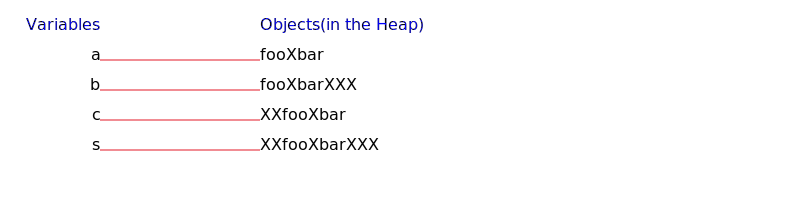

In [123]:
# strip can remove chars at the begining(left) 
# and/or end(right) of a string
# Note middle 'X' is not removed
# Most commonly used to remove new lines from a string
# again, the original 's' string is NEVER modified

s = 'XXfooXbarXXX'
a = s.strip('X')
b = s.lstrip('X') 
c = s.rstrip('X')
memgraph(['s','a','b','c'])

In [124]:
# '+' concatenates strings as well as lists
# the operation '+' performs depends on 
# the type of the arguments

s + s

'XXfooXbarXXXXXfooXbarXXX'

In [125]:
# sort of weird - multiplication repeats strings

2*"abc", "xyz"*4

('abcabc', 'xyzxyzxyzxyz')

In [126]:
# 'in' looks for substrings
# case sensitive compares

s = 'zappa'
'pa' in s, 'Za' in s, s.count('p'), s.count('ap')

(True, False, 2, 1)

In [127]:
# search for a substring with 'find' or 'index'

s.find('pa'), s.index('pa')

(3, 3)

In [128]:
# if index can't find anything, it throws an error!

s.index('32')

ValueError: substring not found

In [129]:
# 'find' is not such a hothead, it just returns -1
# on a miss, which is often more convenient

s.find('32')

-1

In [130]:
# 'ord' and 'chr' do character-int conversions

ord('A'), chr(65)

(65, 'A')

In [133]:
# make string of even lower case chars in a-z
# somewhat terse one liner - 
# in Python you can do alot with a little code, 
# but can be hard to read
# '\' continues a line


''.join([chr(c) for c in range(ord('a'), ord('z')+1) if c % 2 == 0])


'bdfhjlnprtvxz'

In [134]:
# let's break it into separate steps:
# get the ascii codes for 'a' and 'z'
# can see ascii codes on mac and linux with:
# man ascii

a = ord('a')
z = ord('z')
a,z

(97, 122)

In [135]:
# now we have all the codes for 'a' to 'z'
# note the z+1 - need the +1 to get the z code

codes = [c for c in range(a,z+1) if c % 2 == 0]
print(codes)

[98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122]


In [136]:
# now we have a list of the lower case characters

chars = [chr(c) for c in codes]
print(chars)

['b', 'd', 'f', 'h', 'j', 'l', 'n', 'p', 'r', 't', 'v', 'x', 'z']


In [137]:
# last step - using the 'join' method on string, 
# merge the chars into one string
# some people like the one-liners, others like to use several 
# steps

''.join(chars)

'bdfhjlnprtvxz'

In [138]:
# the string module has useful constants:

import string

for s in [string.ascii_lowercase, 
          string.ascii_uppercase, 
            string.digits, 
          string.punctuation]:
    print(s)

abcdefghijklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [139]:
# can slice strings, and access chars

len(lc), lc[10:20], lc[10:20:2], lc[10]

(13, 'vxz', 'vz', 'v')

In [140]:
# unlike list objects, string objects don't 
# have a reverse method
# but you can reverse with a slice
# works with lists as well

s = '1234'
z = [1,2,3,4]
s[::-1], z[::-1]

('4321', [4, 3, 2, 1])

In [141]:
# startswith, endwith string methods are sometimes 
# convenient alternatives to more complex operations
# like regular expressions

a = "foo.txt"

a.startswith('foo'), a.endswith('txt'), a.endswith('txt2')

(True, True, False)

In [142]:
# 'str' function converts any object 
# to a string representation

str(234), str(3.34), str([1,2,3])

('234', '3.34', '[1, 2, 3]')

In [143]:
# 'list' converts a string into a list of 
# characters(length one strings). 
# likewise for tuple

list('foobar'), tuple('foobar')

(['f', 'o', 'o', 'b', 'a', 'r'], ('f', 'o', 'o', 'b', 'a', 'r'))

In [144]:
# a given sequence of characters is a singleton
# so str of a string just returns the arg

s1 = 'foobar'
s2 = 'foo' + 'bar'
s1 == s2, str('foobar') is s1

(True, True)

# 'printf' style string formatting - old way
    - still works, but deprecated

In [145]:
'int %d float %f string %s' % (3, 5.5, 'printf')

'int 3 float 5.500000 string printf'

# 'printf' style string formatting - new way
- new, preferred method
- looks at the type of the arg, so don't have to specify type in control string
- a '{}' in the control string uses and formats an arg
- [doc](https://docs.python.org/3.5/library/string.html#custom-string-formatting)

In [146]:
'int {} float {} string {}'.format(3, 5.5, 'printf')

'int 3 float 5.5 string printf'

In [155]:
# control printing by adding specs inside the '{}'

x = 2.123456789
'{:,} fformat={:f} eformat={:e}'.format(1234567890, x, x)

'1,234,567,890 fformat=2.123457 eformat=2.123457e+00'

# 'printf' sytle string formatting - latest and greatest way!
- use 'f-string' facility - fairly new

In [157]:
f'{1234567890:,} fformat={x:f} eformat={x:e}'

'1,234,567,890 fformat=2.123457 eformat=2.123457e+00'

# lots of methods on strings


In [148]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
